In [1]:
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image
import fitz
import cv2

ocr = PaddleOCR(use_angle_cls=True, lang='en')

[2022/11/29 01:56:34] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\Dino/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\Dino/.paddleocr/whl\\rec\\en\\en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_

[2022/11/29 01:56:36] ppocr DEBUG: dt_boxes num : 17, elapse : 0.1010446548461914
[2022/11/29 01:56:36] ppocr DEBUG: cls num  : 17, elapse : 0.1146245002746582
[2022/11/29 01:56:38] ppocr DEBUG: rec_res num  : 17, elapse : 1.6142044067382812


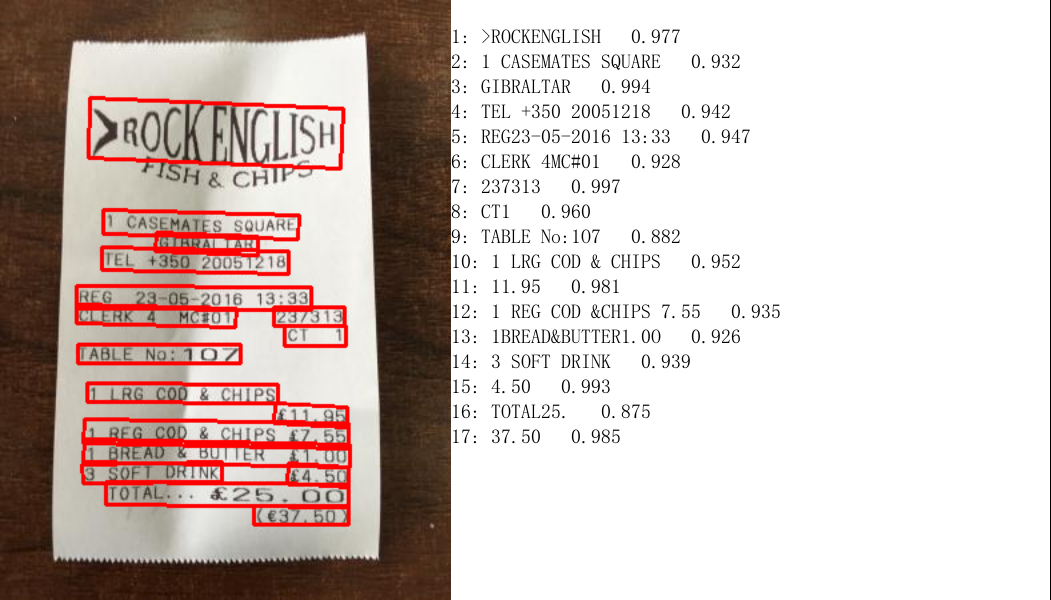

In [2]:
img_path = 'images/receipt.jpg'
result = ocr.ocr(img_path, cls=True)
for idx in range(len(result)):
    res = result[idx]

result = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='./fonts/simfang.ttf')
im_show = Image.fromarray(im_show)
display(im_show)

[2022/11/29 01:56:40] ppocr DEBUG: dt_boxes num : 55, elapse : 0.4645810127258301
[2022/11/29 01:56:41] ppocr DEBUG: cls num  : 55, elapse : 0.4025709629058838
[2022/11/29 01:56:46] ppocr DEBUG: rec_res num  : 55, elapse : 5.202995777130127


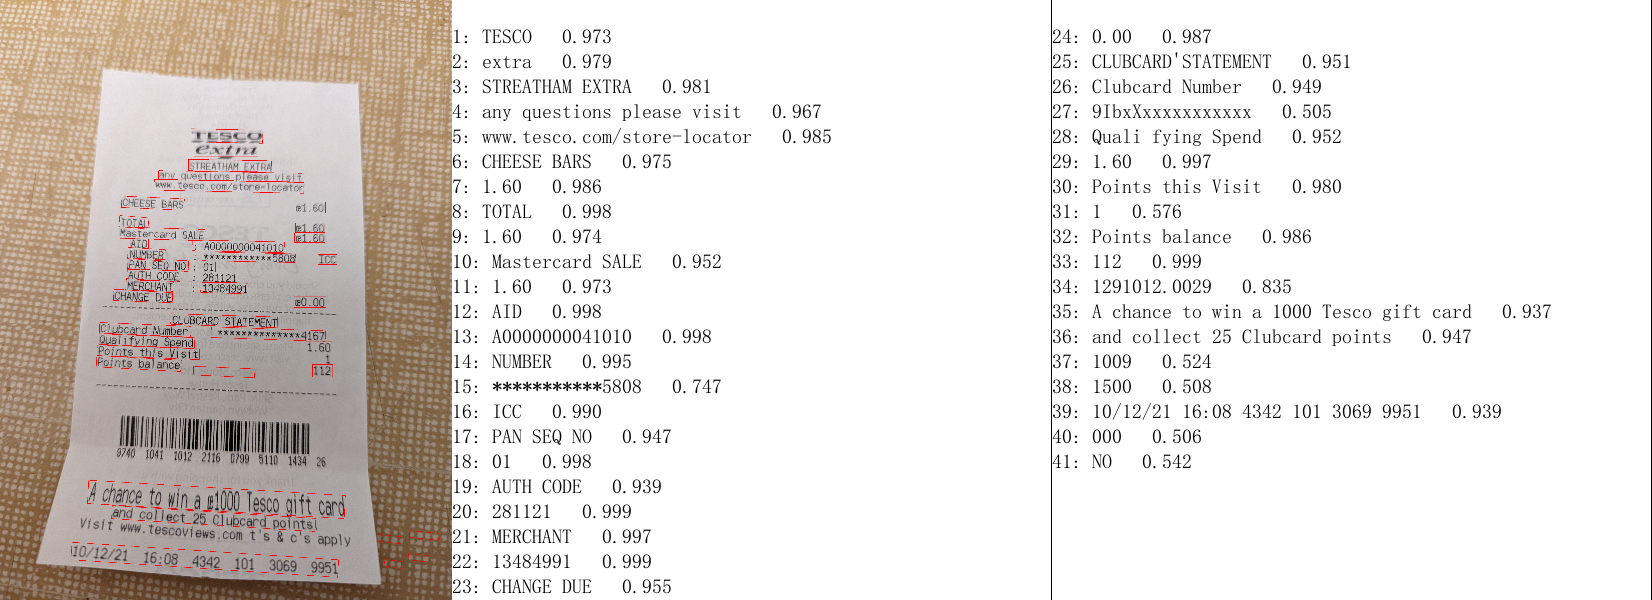

In [3]:
img_path = 'images/reciept_blurry.jpg'
result = ocr.ocr(img_path, cls=True)
for idx in range(len(result)):
    res = result[idx]

result = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='./fonts/simfang.ttf')
im_show = Image.fromarray(im_show)
display(im_show)

In [ ]:
ocr = PaddleOCR(use_angle_cls=True, lang="en", page_num=1)  # need to run only once to download and load model into memory
img_path = 'images/HowtoReadPaper.pdf'
result = ocr.ocr(img_path, cls=True)
for idx in range(len(result)):
    res = result[idx]

import fitz
from PIL import Image
import cv2
import numpy as np
imgs = []
with fitz.open(img_path) as pdf:
    for pg in range(0, pdf.pageCount):
        page = pdf[pg]
        mat = fitz.Matrix(2, 2)
        pm = page.getPixmap(matrix=mat, alpha=False)

        if pm.width > 2000 or pm.height > 2000:
            pm = page.getPixmap(matrix=fitz.Matrix(1, 1), alpha=False)

        img = Image.frombytes("RGB", [pm.width, pm.height], pm.samples)
        img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
        imgs.append(img)
for idx in range(len(result)):
    res = result[idx]
    image = imgs[idx]
    boxes = [line[0] for line in res]
    txts = [line[1][0] for line in res]
    scores = [line[1][1] for line in res]
    im_show = draw_ocr(image, boxes, txts, scores, font_path='./fonts/simfang.ttf')
    im_show = Image.fromarray(im_show)
    display(im_show)

[2022/11/29 02:20:29] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=1, det_algorithm='DB', det_model_dir='C:\\Users\\Dino/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\Dino/.paddleocr/whl\\rec\\en\\en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_